## CIFAR Fastai

`%matplotlib inline` - ensures matplotlib will plot to output cell in notebook
`%reload_ext autoreload, %autoreload 2` - automatically reloads modules if edited

In [88]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import sklearn
import matplotlib.pyplot as plt
torch.__version__

'1.0.1'

In [89]:
import fastai
from fastai.vision import *
from fastai.vision import learner
fastai.__version__

'1.0.50.post1'

In [90]:
path = untar_data(URLs.CIFAR, fname = '../../data/cifar');
path # output >>> PosixPath('/home/jupyter/.fastai/data/cifar10')
# dataset folder structure
path.ls() # output >>> ['test', 'labels.txt', 'train']

[WindowsPath('C:/Users/HYJ/.fastai/data/cifar10/labels.txt'),
 WindowsPath('C:/Users/HYJ/.fastai/data/cifar10/models'),
 WindowsPath('C:/Users/HYJ/.fastai/data/cifar10/test'),
 WindowsPath('C:/Users/HYJ/.fastai/data/cifar10/train')]

In [93]:
bs = 64 # batch size
img_size = 24 # image size

In [94]:
# 随机旋转正负20度
tfms = [rotate(degrees=(-20,20)), symmetric_warp(magnitude=(-0.3,0.3))]

In [99]:
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, valid='test', size=img_size, bs = bs,num_workers=0) 
# normalising the dataset using the same normalisation applied to the imagenet dataset
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: C:\Users\HYJ\.fastai\data\cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: C:\Users\HYJ\.fastai\data\cifar10;

Test: None

In [100]:
print(data.classes)
len(data.classes),data.c

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


(10, 10)

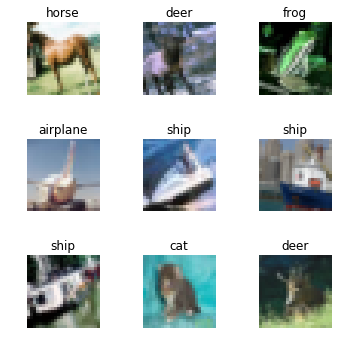

In [101]:
data.show_batch(rows=3, figsize=(5,5))

In [33]:
cnn_learner?

Signature:
cnn_learner(
    data: fastai.basic_data.DataBunch,
    base_arch: Callable,
    cut: Union[int, Callable] = None,
    pretrained: bool = True,
    lin_ftrs: Union[Collection[int], NoneType] = None,
    ps: Union[float, Collection[float]] = 0.5,
    custom_head: Union[torch.nn.modules.module.Module, NoneType] = None,
    split_on: Union[Callable, Collection[Collection[torch.nn.modules.module.Module]], NoneType] = None,
    bn_final: bool = False,
    init=<function kaiming_normal_ at 0x00000197EB530620>,
    concat_pool: bool = True,
    **kwargs: Any,
) -> fastai.basic_train.Learner
Docstring: Build convnet style learner.
File:      c:\users\hyj\anaconda3\envs\py37fastai10\lib\site-packages\fastai\vision\learner.py
Type:      function


模型选用：https://docs.fast.ai/vision.models.html

### ResNet34

#### 参考链接

- [用fastai ResNet50训练CIFAR10，85%准确度](https://www.wandouip.com/t5i290554/)
- https://github.com/init27/RTX-2080Ti-Vs-GTX-1080Ti-CIFAR-100-Benchmarks
- [RTX 2080Ti Vs GTX 1080Ti: FastAI Mixed Precision training & comparisons on CIFAR-100](https://hackernoon.com/rtx-2080ti-vs-gtx-1080ti-fastai-mixed-precision-training-comparisons-on-cifar-100-761d8f615d7f)
- [CIFAR-10 Method Ranking](https://benchmarks.ai/cifar-10) last updated 2019
- [CIFAR-10 classification_datasets_results](https://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130) last updated 2015

In [104]:
learn2 = cnn_learner(data=data, base_arch=models.resnet34, metrics=error_rate)

In [105]:
learn2.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.720088,1.622096,0.579700,02:57
1,1.434909,1.386084,0.493900,02:36
2,1.282486,1.263531,0.445900,02:37
3,1.211318,1.215538,0.432100,02:41
4,1.172171,1.215703,0.430800,02:38


In [106]:
learn2.save('res34-stage-1') # saving the model weights

In [107]:
learn2.load('res34-stage-1') # loading the model weights

Learner(data=ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: C:\Users\HYJ\.fastai\data\cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: C:\Users\HYJ\.fastai\data\cifar10;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d

- 评估

In [108]:
interp = ClassificationInterpretation.from_learner(learn2)

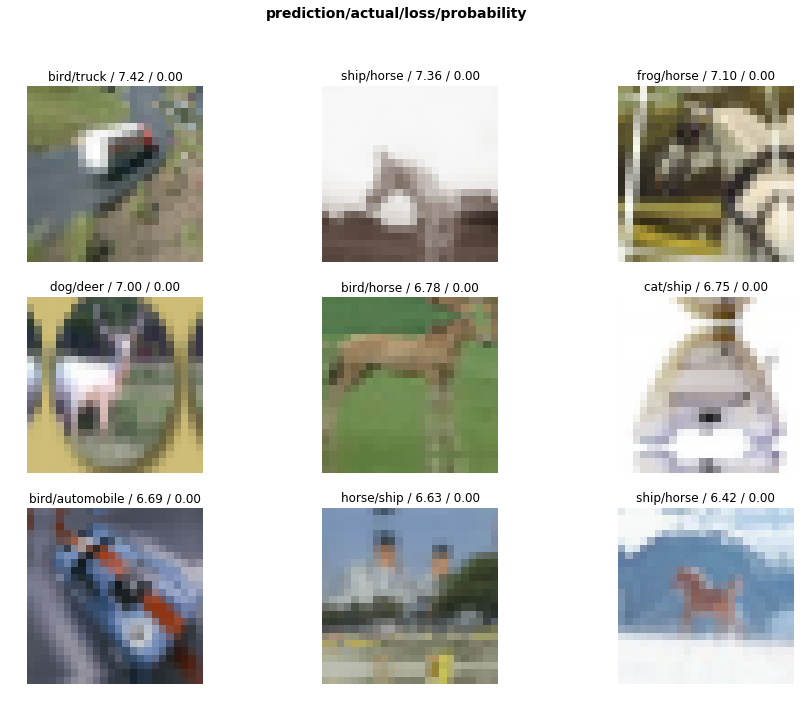

In [109]:
interp.plot_top_losses(9, figsize=(15,11))

In [115]:
interp.plot_confusion_matrix?

Signature:
interp.plot_confusion_matrix(
    normalize: bool = False,
    title: str = 'Confusion matrix',
    cmap: Any = 'Blues',
    slice_size: int = 1,
    norm_dec: int = 2,
    plot_txt: bool = True,
    return_fig: bool = None,
    **kwargs,
) -> Union[matplotlib.figure.Figure, NoneType]
Docstring: Plot the confusion matrix, with `title` and using `cmap`.
File:      c:\users\hyj\anaconda3\envs\py37fastai10\lib\site-packages\fastai\train.py
Type:      method


`cmap`可以看 https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html

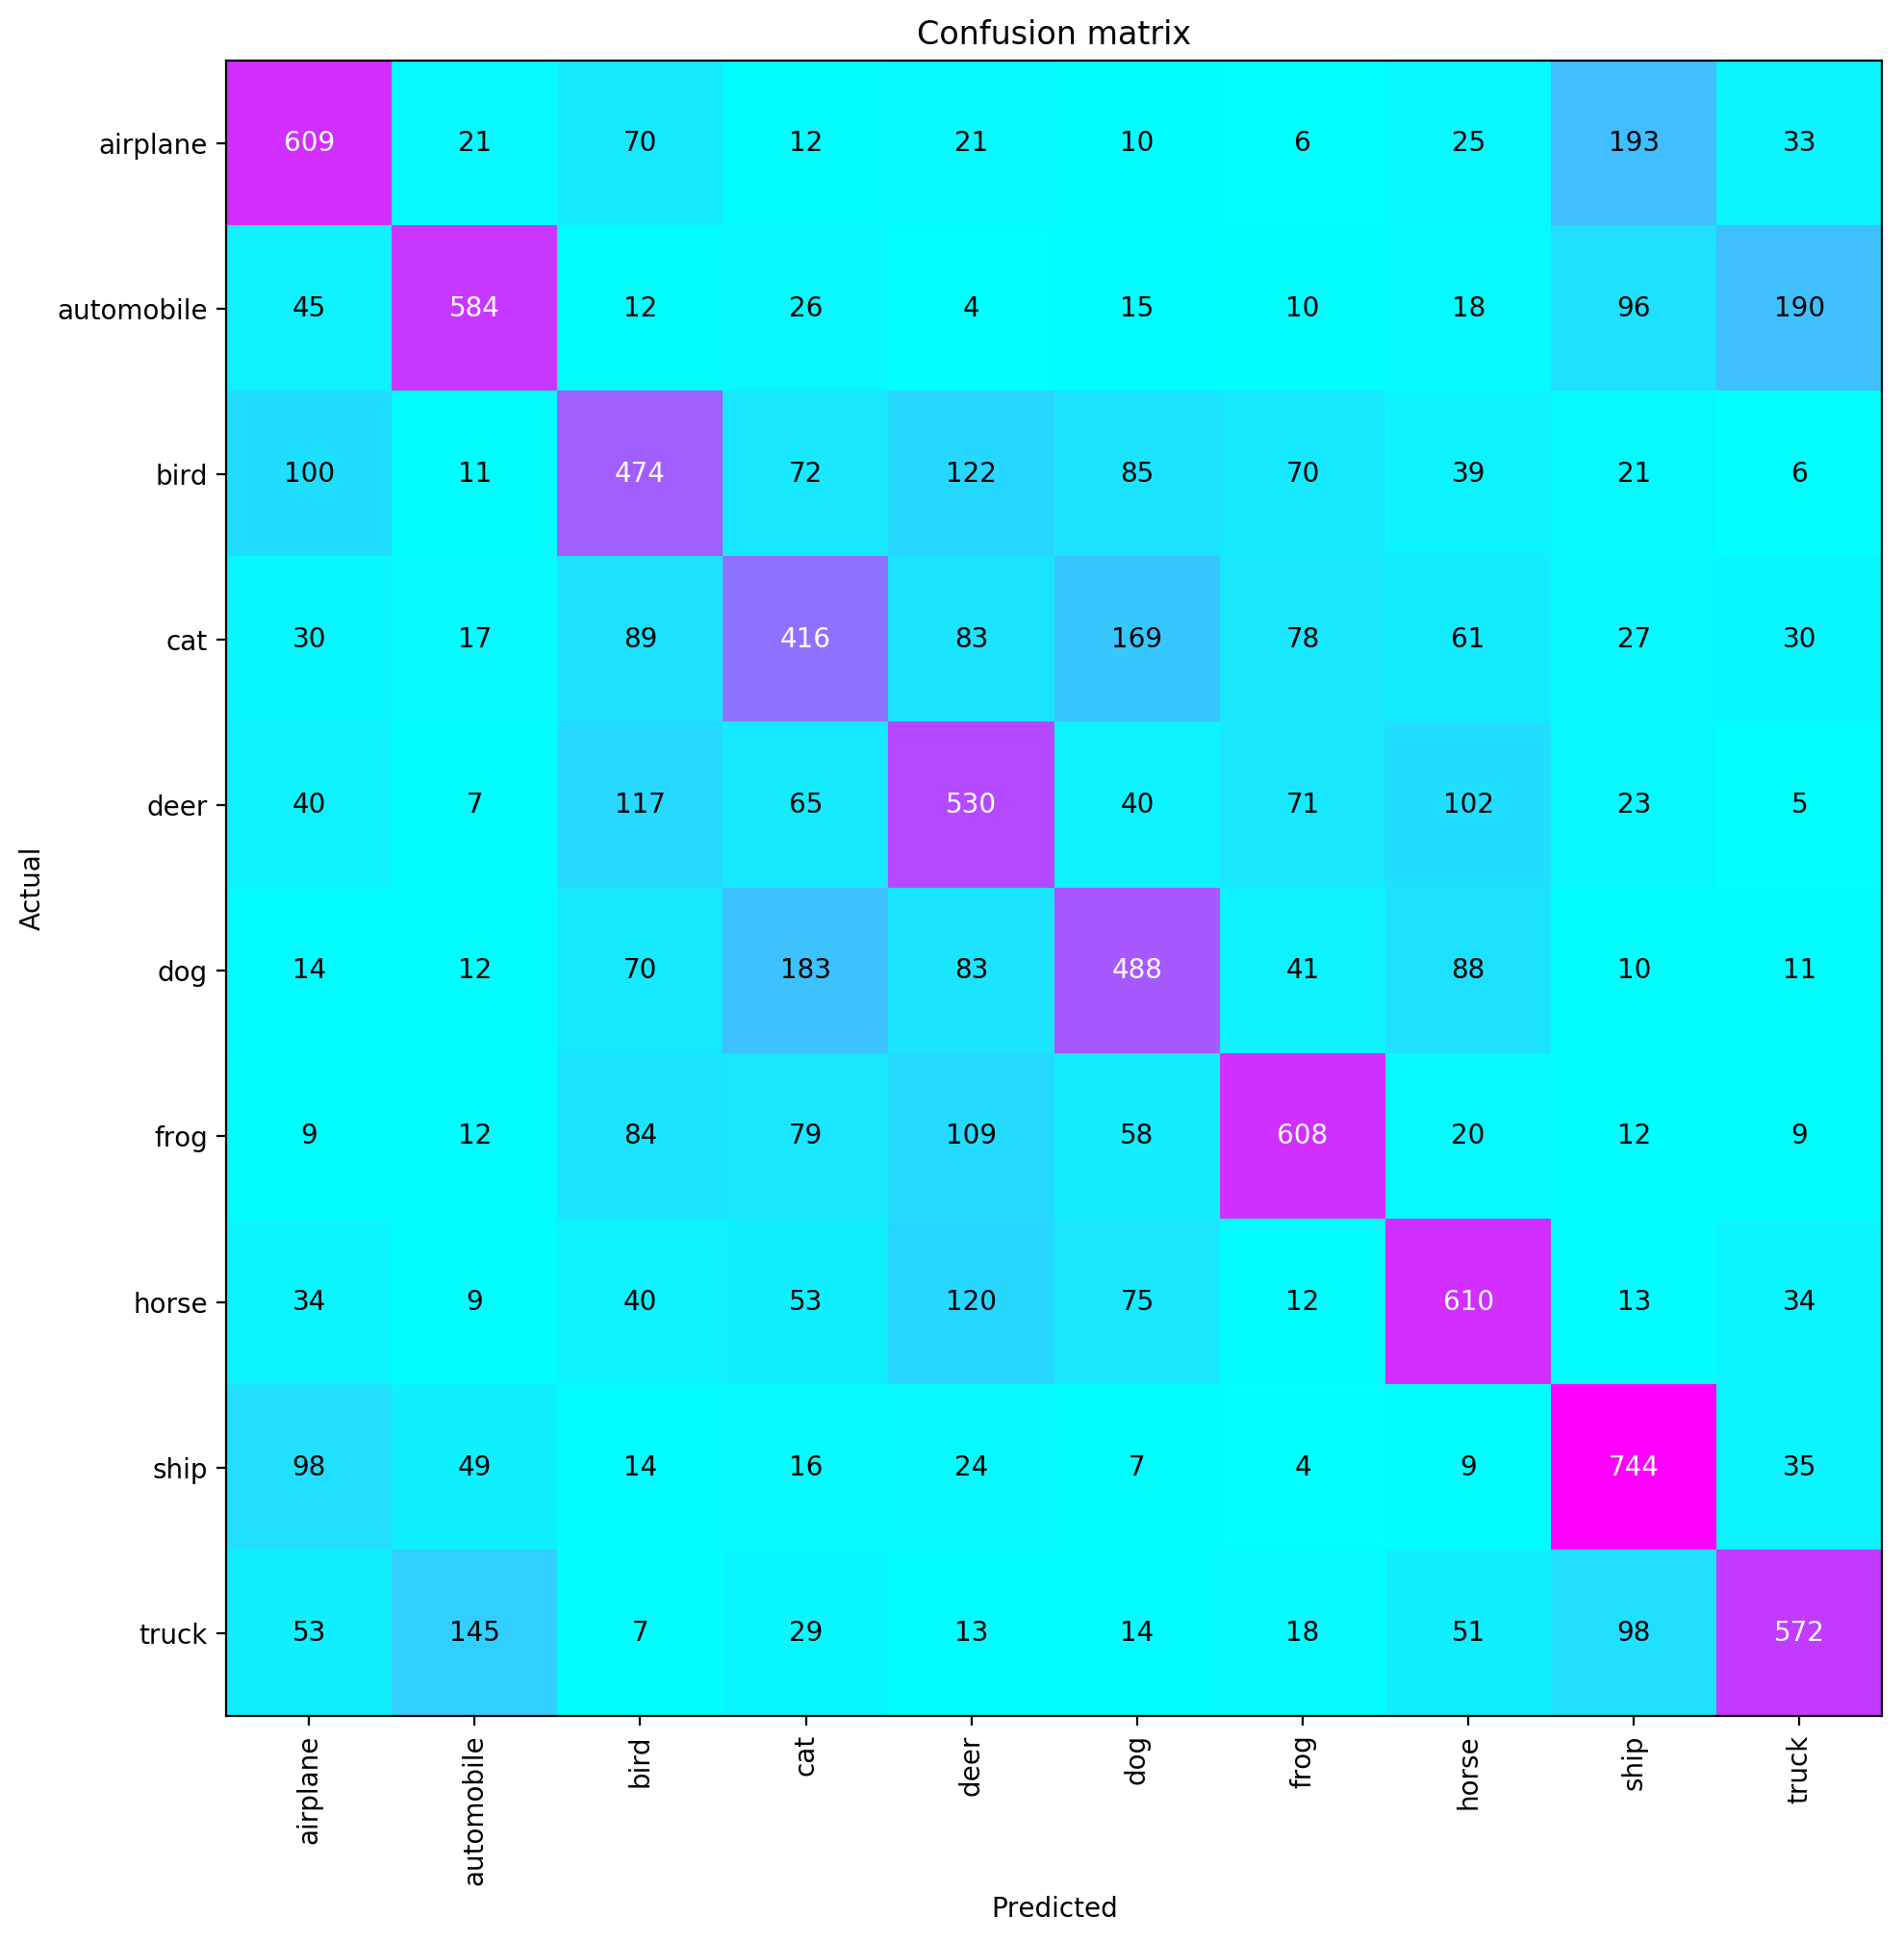

In [119]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=200, cmap='cool')

In [113]:
interp.most_confused(min_val=50)

[('airplane', 'ship', 193),
 ('automobile', 'truck', 190),
 ('dog', 'cat', 183),
 ('cat', 'dog', 169),
 ('truck', 'automobile', 145),
 ('bird', 'deer', 122),
 ('horse', 'deer', 120),
 ('deer', 'bird', 117),
 ('frog', 'deer', 109),
 ('deer', 'horse', 102),
 ('bird', 'airplane', 100),
 ('ship', 'airplane', 98),
 ('truck', 'ship', 98),
 ('automobile', 'ship', 96),
 ('cat', 'bird', 89),
 ('dog', 'horse', 88),
 ('bird', 'dog', 85),
 ('frog', 'bird', 84),
 ('cat', 'deer', 83),
 ('dog', 'deer', 83),
 ('frog', 'cat', 79),
 ('cat', 'frog', 78),
 ('horse', 'dog', 75),
 ('bird', 'cat', 72),
 ('deer', 'frog', 71),
 ('airplane', 'bird', 70),
 ('bird', 'frog', 70),
 ('dog', 'bird', 70),
 ('deer', 'cat', 65),
 ('cat', 'horse', 61),
 ('frog', 'dog', 58),
 ('horse', 'cat', 53),
 ('truck', 'airplane', 53),
 ('truck', 'horse', 51)]

### VGG19-BatchNormalization

In [120]:
learn3 = cnn_learner(data=data, base_arch=models.vgg19_bn, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to C:\Users\HYJ/.torch\models\vgg19_bn-c79401a0.pth
574769405it [03:41, 2595258.38it/s]


In [121]:
learn3.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.151372,2.165868,0.766800,02:55
1,1.697004,1.680065,0.601700,02:54
2,1.442591,1.435466,0.509200,02:54
3,1.309384,1.345082,0.474500,02:54
4,1.302520,1.326810,0.464000,02:56


更换网络，变换学习率，数据增广，使用更深的网络，变换新的学习率

In [123]:
learn3.save('vgg19_bn-stage-1') # saving the model weights

In [124]:
learn3.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.267744,1.293777,0.446600,02:53
1,1.214567,1.213845,0.419500,02:55
2,1.076481,1.134961,0.393600,02:58
3,1.028316,1.107962,0.393300,02:55
4,1.027766,1.100955,0.383200,02:56


In [125]:
learn3.save('vgg19_bn-stage-2') # saving the model weights

In [126]:
learn3.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.055619,1.095777,0.379900,02:54
1,1.005632,1.061578,0.370500,02:54
2,0.985619,1.036538,0.363400,02:52
3,0.923557,1.009014,0.350200,02:56
4,0.924958,1.024297,0.359000,02:52


In [131]:
learn3.load('vgg19_bn-stage-2') # loading the model weights

Learner(data=ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: C:\Users\HYJ\.fastai\data\cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: C:\Users\HYJ\.fastai\data\cifar10;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace)
      (6): MaxPool2d(kernel_size=2, strid

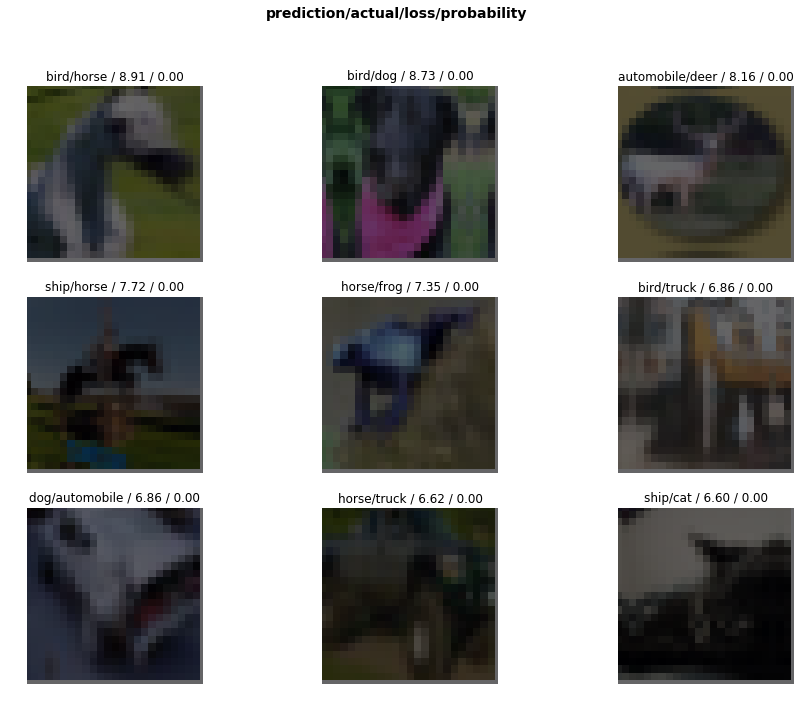

In [132]:
interp2 = ClassificationInterpretation.from_learner(learn3)
interp2.plot_top_losses(9, figsize=(15,11))

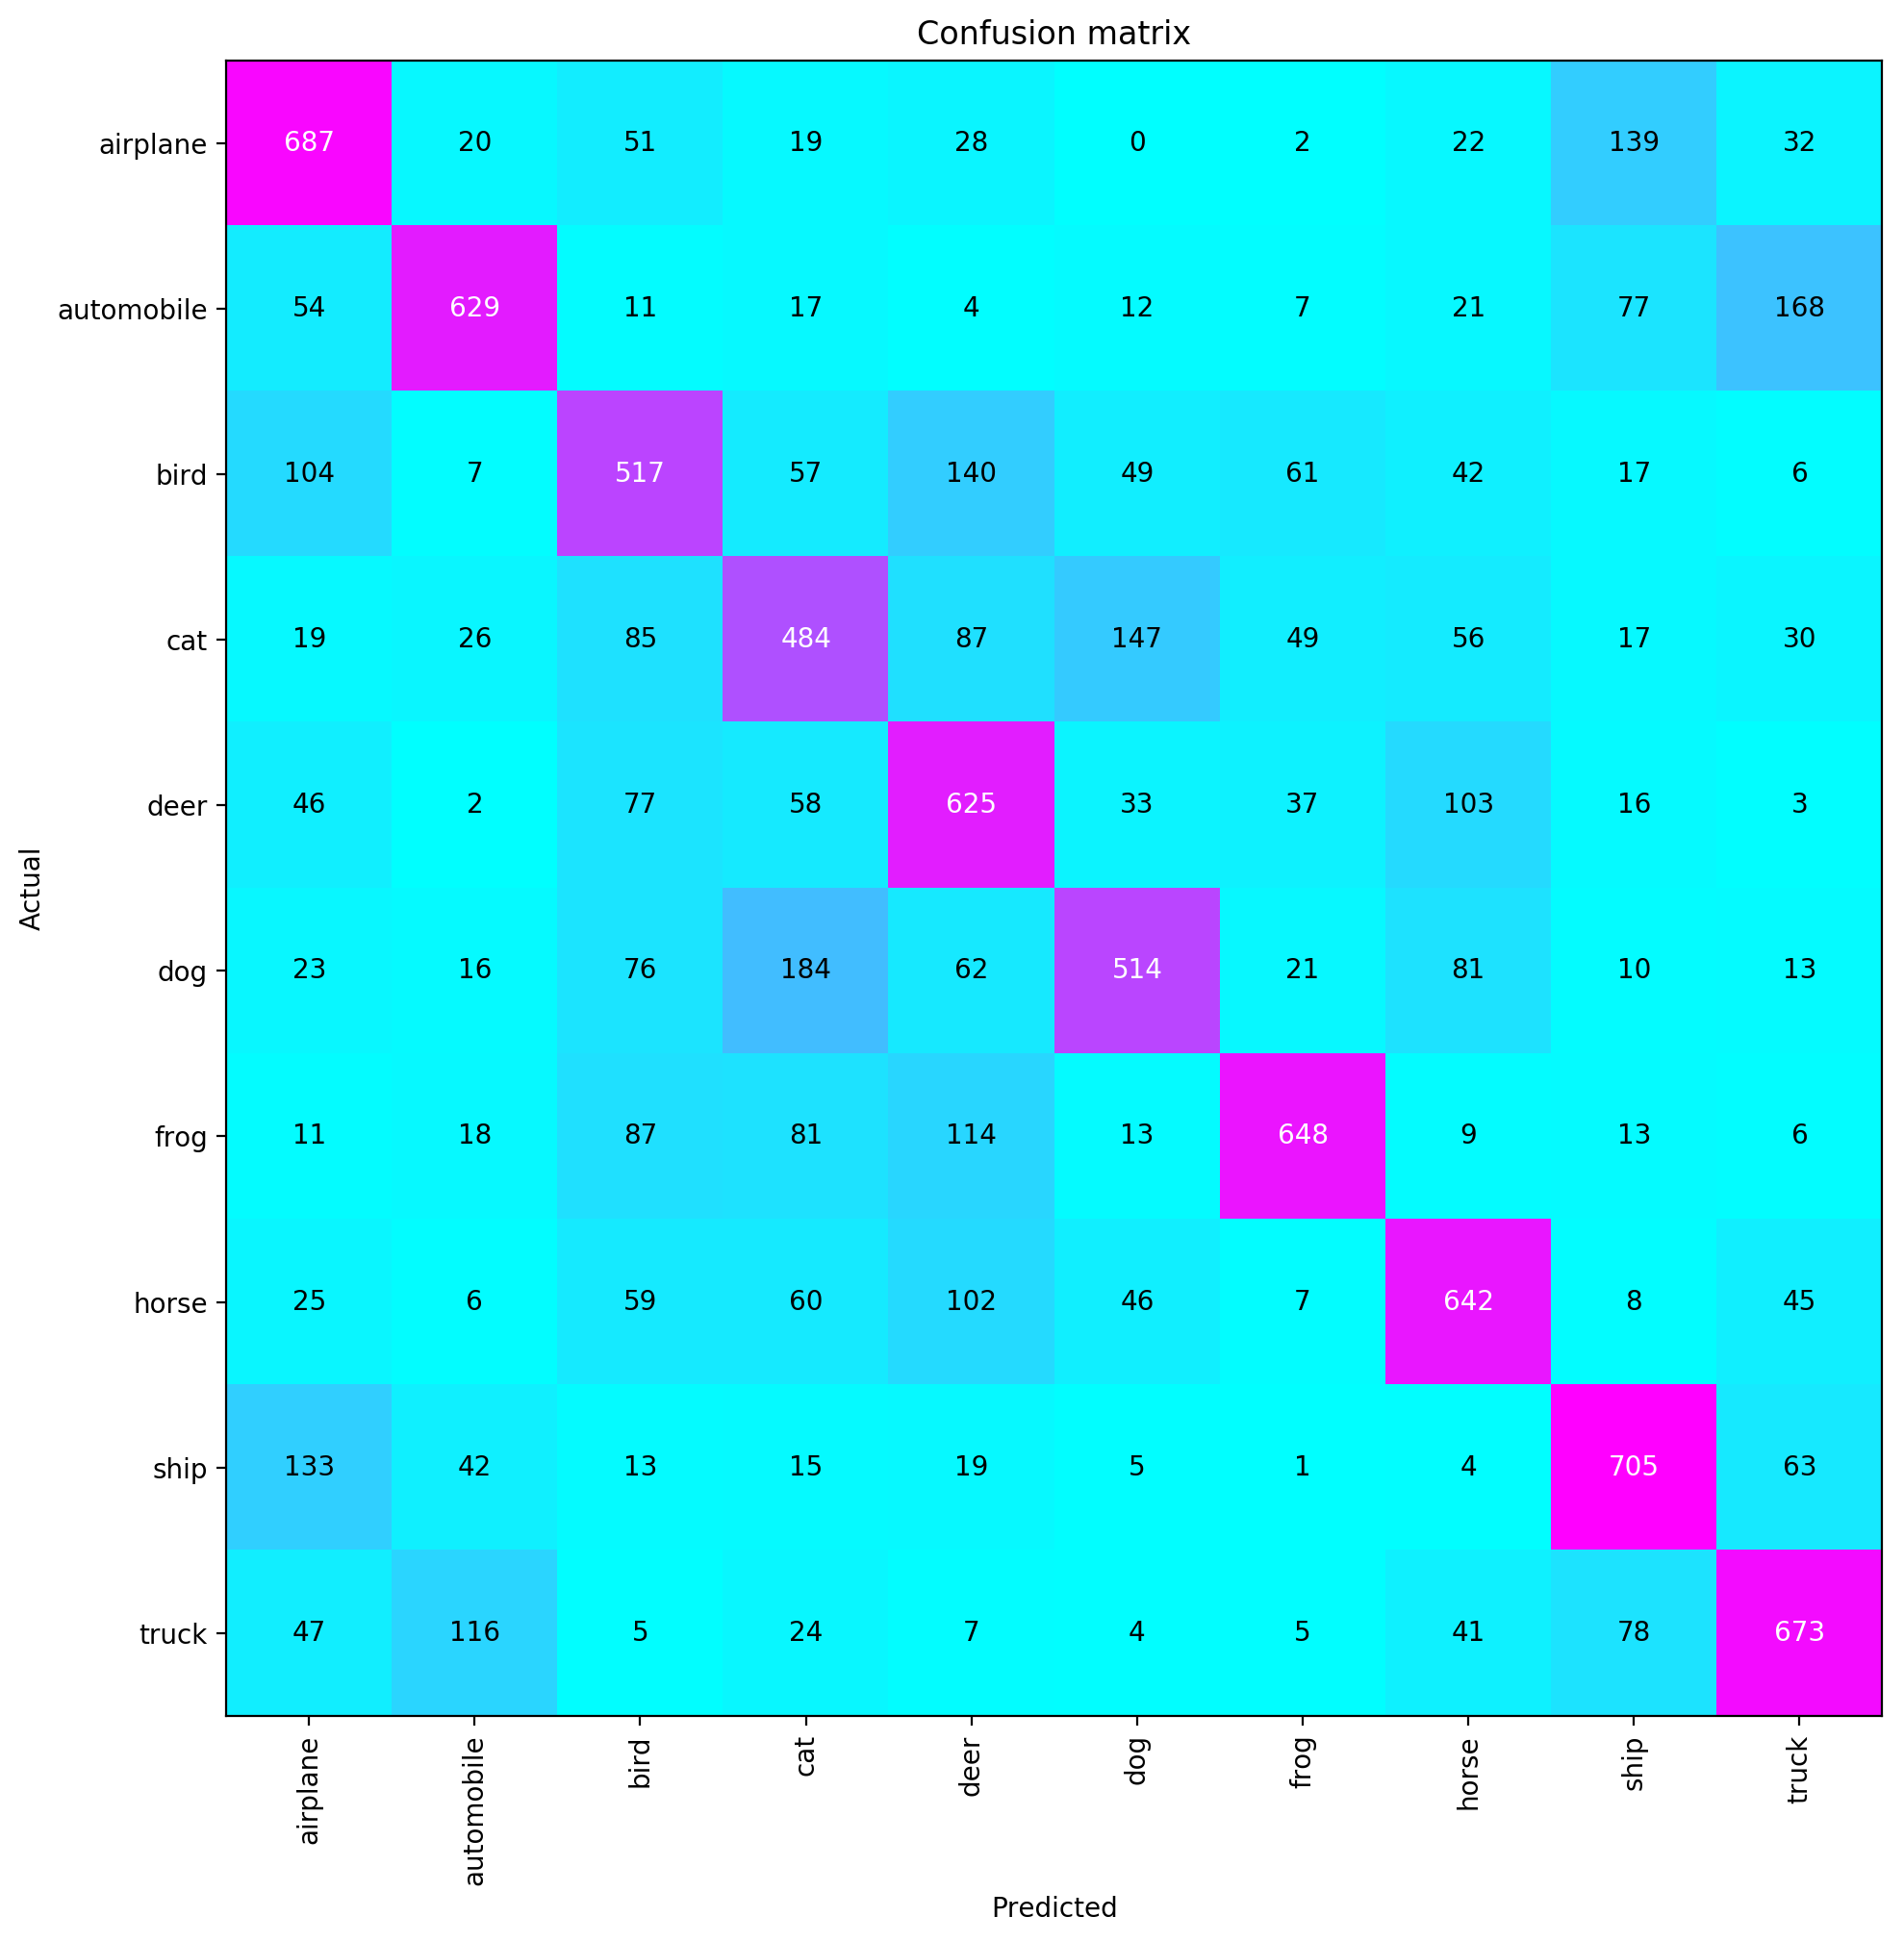

In [133]:
interp2.plot_confusion_matrix(figsize=(10,10), dpi=200, cmap='cool')